In [3]:
#!pip install test_utils

import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf

import tensorflow.keras.layers as tfl

from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation
#from test_utils import summary, comparator

Found 970 files belonging to 10 classes.
Using 776 files for training.
Found 970 files belonging to 10 classes.
Using 194 files for validation.


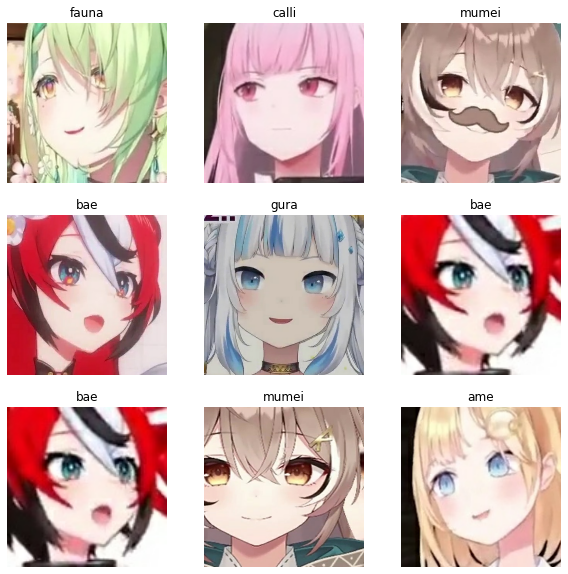

In [4]:
BATCH_SIZE = 200 
IMG_SIZE = (160, 160) #technically is not but each one is slightly different
directory = "anime-face-detector/data/cropped/"
train_dataset = image_dataset_from_directory(directory,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             validation_split=0.2,
                                             subset='training',
                                             seed=42)
validation_dataset = image_dataset_from_directory(directory,
                                             shuffle=True,
                                             batch_size=BATCH_SIZE,
                                             image_size=IMG_SIZE,
                                             validation_split=0.2,
                                             subset='validation',
                                             seed=42)

class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

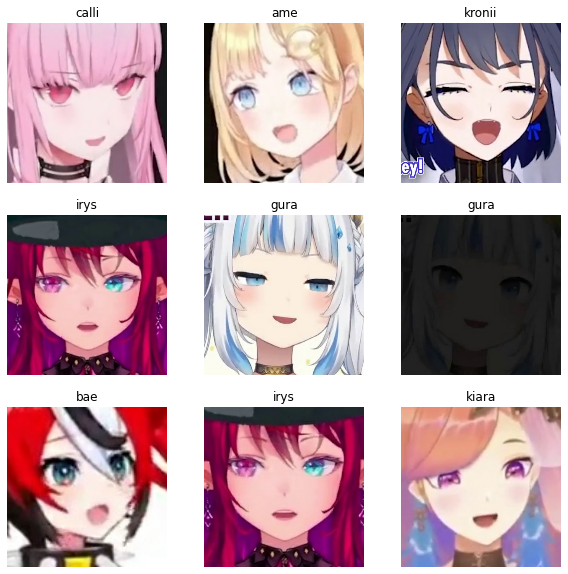

In [6]:
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [7]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)

In [8]:
def data_augmenter():
    '''
    Create a Sequential model composed of 2 layers
    Returns:
        tf.keras.Sequential
    '''
    data_augmentation = tf.keras.Sequential([
  tfl.experimental.preprocessing.RandomFlip("horizontal"),
  tfl.experimental.preprocessing.RandomRotation(0.2),
])
    
    return data_augmentation

augmenter = data_augmenter()

assert(augmenter.layers[0].name.startswith('random_flip')), "First layer must be RandomFlip"
assert augmenter.layers[0].mode == 'horizontal', "RadomFlip parameter must be horizontal"
assert(augmenter.layers[1].name.startswith('random_rotation')), "Second layer must be RandomRotation"
assert augmenter.layers[1].factor == 0.2, "Rotation factor must be 0.2"
print('\033[92mAll tests passed!')

All tests passed!


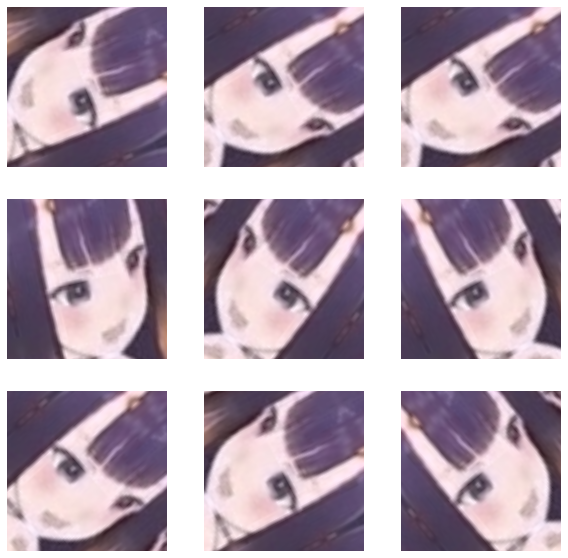

In [9]:
data_augmentation = data_augmenter()

for image, _ in train_dataset.take(1):
    plt.figure(figsize=(10, 10))
    first_image = image[0]
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        augmented_image = data_augmentation(tf.expand_dims(first_image, 0))
        plt.imshow(augmented_image[0] / 255)
        plt.axis('off')

In [10]:
preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input

In [11]:
IMG_SHAPE = IMG_SIZE + (3,)
base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=True,
                                               weights='imagenet')

In [12]:
base_model.summary()

Model: "mobilenetv2_1.00_160"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 160, 160, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 80, 80, 32)   864         ['input_1[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 80, 80, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 80, 80, 32)   0           ['bn_Conv1[0][

 nv2D)                                                                                            
                                                                                                  
 block_3_depthwise_BN (BatchNor  (None, 20, 20, 144)  576        ['block_3_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_3_depthwise_relu (ReLU)  (None, 20, 20, 144)  0           ['block_3_depthwise_BN[0][0]']   
                                                                                                  
 block_3_project (Conv2D)       (None, 20, 20, 32)   4608        ['block_3_depthwise_relu[0][0]'] 
                                                                                                  
 block_3_project_BN (BatchNorma  (None, 20, 20, 32)  128         ['block_3_project[0][0]']        
 lization)

 ization)                                                                                         
                                                                                                  
 block_7_expand_relu (ReLU)     (None, 10, 10, 384)  0           ['block_7_expand_BN[0][0]']      
                                                                                                  
 block_7_depthwise (DepthwiseCo  (None, 10, 10, 384)  3456       ['block_7_expand_relu[0][0]']    
 nv2D)                                                                                            
                                                                                                  
 block_7_depthwise_BN (BatchNor  (None, 10, 10, 384)  1536       ['block_7_depthwise[0][0]']      
 malization)                                                                                      
                                                                                                  
 block_7_d

 block_10_project_BN (BatchNorm  (None, 10, 10, 96)  384         ['block_10_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_11_expand (Conv2D)       (None, 10, 10, 576)  55296       ['block_10_project_BN[0][0]']    
                                                                                                  
 block_11_expand_BN (BatchNorma  (None, 10, 10, 576)  2304       ['block_11_expand[0][0]']        
 lization)                                                                                        
                                                                                                  
 block_11_expand_relu (ReLU)    (None, 10, 10, 576)  0           ['block_11_expand_BN[0][0]']     
                                                                                                  
 block_11_

                                                                                                  
 block_14_depthwise_relu (ReLU)  (None, 5, 5, 960)   0           ['block_14_depthwise_BN[0][0]']  
                                                                                                  
 block_14_project (Conv2D)      (None, 5, 5, 160)    153600      ['block_14_depthwise_relu[0][0]']
                                                                                                  
 block_14_project_BN (BatchNorm  (None, 5, 5, 160)   640         ['block_14_project[0][0]']       
 alization)                                                                                       
                                                                                                  
 block_14_add (Add)             (None, 5, 5, 160)    0           ['block_13_project_BN[0][0]',    
                                                                  'block_14_project_BN[0][0]']    
          

In [13]:
nb_layers = len(base_model.layers)
print(base_model.layers[nb_layers - 2].name)
print(base_model.layers[nb_layers - 1].name)

global_average_pooling2d
predictions


In [14]:
image_batch, label_batch = next(iter(train_dataset))
feature_batch = base_model(image_batch)
print(feature_batch.shape)

(200, 1000)


In [15]:
label_batch

<tf.Tensor: shape=(200,), dtype=int32, numpy=
array([3, 8, 4, 7, 9, 7, 9, 6, 1, 3, 2, 2, 1, 6, 0, 3, 3, 6, 0, 6, 9, 3,
       2, 4, 1, 9, 4, 1, 1, 1, 3, 5, 6, 8, 3, 8, 7, 2, 2, 7, 1, 1, 1, 1,
       1, 5, 6, 9, 9, 7, 0, 1, 1, 6, 6, 9, 1, 1, 1, 1, 4, 8, 1, 2, 7, 6,
       4, 1, 6, 3, 5, 2, 4, 8, 3, 7, 2, 4, 9, 6, 3, 9, 0, 4, 3, 1, 1, 8,
       1, 1, 7, 3, 1, 1, 4, 1, 1, 8, 1, 6, 2, 4, 8, 2, 9, 6, 2, 3, 8, 5,
       4, 7, 1, 9, 3, 8, 1, 3, 9, 5, 1, 1, 3, 4, 3, 3, 3, 2, 8, 1, 0, 7,
       7, 1, 1, 8, 9, 1, 7, 5, 9, 1, 7, 8, 7, 1, 9, 5, 6, 3, 6, 2, 4, 7,
       0, 5, 1, 2, 2, 1, 1, 1, 9, 4, 5, 1, 6, 2, 1, 1, 1, 2, 6, 7, 6, 1,
       8, 1, 9, 5, 5, 5, 0, 6, 8, 6, 7, 8, 3, 3, 8, 7, 0, 5, 6, 5, 6, 7,
       2, 4], dtype=int32)>

In [24]:
base_model.trainable = False
image_var = tf.Variable(image_batch)
pred = base_model(image_var)

tf.keras.applications.mobilenet_v2.decode_predictions(pred.numpy(), top=2)

[[('n03271574', 'electric_fan', 0.24171306),
  ('n04589890', 'window_screen', 0.16027886)],
 [('n02879718', 'bow', 0.25153387), ('n03868863', 'oxygen_mask', 0.07349859)],
 [('n03271574', 'electric_fan', 0.08904464),
  ('n04589890', 'window_screen', 0.0718562)],
 [('n03271574', 'electric_fan', 0.209194),
  ('n04589890', 'window_screen', 0.20035106)],
 [('n04589890', 'window_screen', 0.21092413),
  ('n04590129', 'window_shade', 0.097193554)],
 [('n04589890', 'window_screen', 0.72267485),
  ('n03347037', 'fire_screen', 0.028360428)],
 [('n03692522', 'loupe', 0.060391083), ('n01930112', 'nematode', 0.04704967)],
 [('n03271574', 'electric_fan', 0.054614037),
  ('n04589890', 'window_screen', 0.041099712)],
 [('n04589890', 'window_screen', 0.12340951),
  ('n03347037', 'fire_screen', 0.0391755)],
 [('n04589890', 'window_screen', 0.3380304),
  ('n03271574', 'electric_fan', 0.26395872)],
 [('n03485794', 'handkerchief', 0.12337741),
  ('n04589890', 'window_screen', 0.05073039)],
 [('n03485794', '

In [19]:
def vtuber_model(image_shape=IMG_SIZE, data_augmentation=data_augmenter()):
    ''' Define a tf.keras model for classification out of the MobileNetV2 model
    Arguments:
        image_shape -- Image width and height
        data_augmentation -- data augmentation function
    Returns:
    Returns:
        tf.keras.model
    '''
    
    
    input_shape = image_shape + (3,)
    
    base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
                                               include_top=False,
                                               weights='imagenet')
    base_model.trainable = False
    inputs = tf.keras.Input(shape=input_shape)
    x = data_augmentation(inputs)
    x = preprocess_input(x)
    x = base_model(x, training=False)
    x = tf.keras.layers.GlobalAveragePooling2D()(x)
    x = tfl.Dropout(.2)(x)
    prediction_layer = tf.keras.layers.Dense(1)
    
    outputs = prediction_layer(x) 
    model = tf.keras.Model(inputs, outputs)
    
    return model

model2 = vtuber_model(IMG_SIZE, data_augmentation)

In [18]:
vtuber_summary = [['InputLayer', [(None, 160, 160, 3)], 0],
                    ['Sequential', (None, 160, 160, 3), 0],
                    ['TensorFlowOpLayer', [(None, 160, 160, 3)], 0],
                    ['TensorFlowOpLayer', [(None, 160, 160, 3)], 0],
                    ['Functional', (None, 5, 5, 1280), 2257984],
                    ['GlobalAveragePooling2D', (None, 1280), 0],
                    ['Dropout', (None, 1280), 0, 0.2],
                    ['Dense', (None, 1), 1281, 'linear']] #linear is the default activation

comparator(summary(model2), vtuber_summary)

for layer in summary(model2):
    print(layer)

NameError: name 'comparator' is not defined

In [20]:
base_learning_rate = 0.01
model2.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:
initial_epochs = 5
history = model2.fit(train_dataset, validation_data=validation_dataset, epochs=initial_epochs)

Epoch 1/5
4/4 [==============================] - 27s 6s/step - loss: -2.4050 - accuracy: 0.1005 - val_loss: -8.7725 - val_accuracy: 0.2113
Epoch 2/5
4/4 [==============================] - 23s 5s/step - loss: -10.8791 - accuracy: 0.1856 - val_loss: -15.8536 - val_accuracy: 0.2113
Epoch 3/5
4/4 [==============================] - 32s 9s/step - loss: -18.8807 - accuracy: 0.1997 - val_loss: -22.8239 - val_accuracy: 0.2113
Epoch 4/5
4/4 [==============================] - 22s 6s/step - loss: -26.8079 - accuracy: 0.1997 - val_loss: -29.7666 - val_accuracy: 0.2113
Epoch 5/5
4/4 [==============================] - 22s 5s/step - loss: -33.8631 - accuracy: 0.1997 - val_loss: -36.6961 - val_accuracy: 0.2113


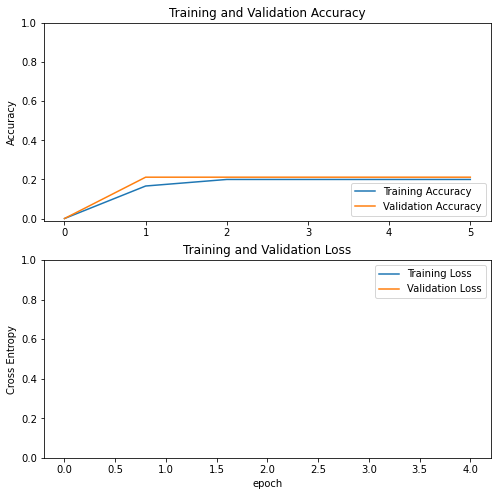

In [19]:
acc = [0.] + history.history['accuracy']
val_acc = [0.] + history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [20]:
class_names

['ame',
 'bae',
 'calli',
 'fauna',
 'gura',
 'ina',
 'irys',
 'kiara',
 'kronii',
 'mumei']

In [21]:
base_model.trainable = True
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(base_model.layers))

# Fine-tune from this layer onwards
fine_tune_at = 120

for layer in base_model.layers[:fine_tune_at]:
    layer.trainable = False
loss_function=tf.keras.losses.BinaryCrossentropy(from_logits=True)
optimizer= tf.keras.optimizers.Adam(learning_rate=0.1*base_learning_rate)
metrics=['accuracy']

model2.compile(loss=loss_function,
              optimizer = optimizer,
              metrics=metrics)

Number of layers in the base model:  156


In [22]:
assert type(loss_function) == tf.keras.losses.BinaryCrossentropy, "Not the correct layer"
assert loss_function.from_logits, "Use from_logits=True"
assert type(optimizer) == tf.keras.optimizers.Adam, "This is not an Adam optimizer"
assert optimizer.lr == base_learning_rate / 10, "Wrong learning rate"
assert metrics[0] == 'accuracy', "Wrong metric"

print('\033[92mAll tests passed!')

All tests passed!


In [23]:
fine_tune_epochs = 5
total_epochs =  initial_epochs + fine_tune_epochs

history_fine = model2.fit(train_dataset,
                         epochs=total_epochs,
                         initial_epoch=history.epoch[-1],
                         validation_data=validation_dataset)

Epoch 5/10
4/4 [==============================] - 36s 8s/step - loss: -44.5996 - accuracy: 0.1997 - val_loss: -43.6424 - val_accuracy: 0.2113
Epoch 6/10
4/4 [==============================] - 28s 7s/step - loss: -52.5762 - accuracy: 0.1997 - val_loss: -50.6970 - val_accuracy: 0.2113
Epoch 7/10
4/4 [==============================] - 30s 7s/step - loss: -60.3175 - accuracy: 0.1997 - val_loss: -57.7061 - val_accuracy: 0.2113
Epoch 8/10
4/4 [==============================] - 29s 7s/step - loss: -68.2557 - accuracy: 0.1997 - val_loss: -64.7406 - val_accuracy: 0.2113
Epoch 9/10
4/4 [==============================] - 32s 8s/step - loss: -76.6105 - accuracy: 0.1997 - val_loss: -71.7812 - val_accuracy: 0.2113
Epoch 10/10
4/4 [==============================] - 27s 7s/step - loss: -84.4142 - accuracy: 0.1997 - val_loss: -78.8118 - val_accuracy: 0.2113


In [29]:
acc += history_fine.history['accuracy']
val_acc += history_fine.history['val_accuracy']

loss += history_fine.history['loss']
val_loss += history_fine.history['val_loss']

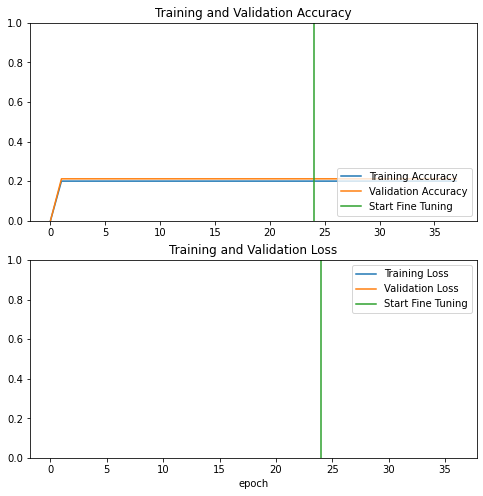

In [30]:
plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.ylim([0, 1])
plt.plot([initial_epochs-1,initial_epochs-1],
          plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.ylim([0, 1.0])
plt.plot([initial_epochs-1,initial_epochs-1],
         plt.ylim(), label='Start Fine Tuning')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [28]:
model2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 160, 160, 3)]     0         
                                                                 
 sequential_1 (Sequential)   (None, 160, 160, 3)       0         
                                                                 
 tf.math.truediv_1 (TFOpLamb  (None, 160, 160, 3)      0         
 da)                                                             
                                                                 
 tf.math.subtract_1 (TFOpLam  (None, 160, 160, 3)      0         
 bda)                                                            
                                                                 
 mobilenetv2_1.00_160 (Funct  (None, 5, 5, 1280)       2257984   
 ional)                                                          
                                                           

In [34]:
pred = model2(image_var)

for i in pred:
    print(i)

#print(pred)

tf.Tensor([15.245369], shape=(1,), dtype=float32)
tf.Tensor([10.956619], shape=(1,), dtype=float32)
tf.Tensor([12.436824], shape=(1,), dtype=float32)
tf.Tensor([11.260405], shape=(1,), dtype=float32)
tf.Tensor([12.667809], shape=(1,), dtype=float32)
tf.Tensor([11.9425335], shape=(1,), dtype=float32)
tf.Tensor([10.134125], shape=(1,), dtype=float32)
tf.Tensor([12.751745], shape=(1,), dtype=float32)
tf.Tensor([11.673964], shape=(1,), dtype=float32)
tf.Tensor([12.18096], shape=(1,), dtype=float32)
tf.Tensor([14.286494], shape=(1,), dtype=float32)
tf.Tensor([11.989476], shape=(1,), dtype=float32)
tf.Tensor([10.790681], shape=(1,), dtype=float32)
tf.Tensor([12.483811], shape=(1,), dtype=float32)
tf.Tensor([10.565466], shape=(1,), dtype=float32)
tf.Tensor([9.972664], shape=(1,), dtype=float32)
tf.Tensor([11.886283], shape=(1,), dtype=float32)
tf.Tensor([11.924383], shape=(1,), dtype=float32)
tf.Tensor([12.013417], shape=(1,), dtype=float32)
tf.Tensor([8.849259], shape=(1,), dtype=float32)
tf